In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('C:/Users/ZMZM/Desktop/Dataset/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


#### 1- Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [2]:
df.shape

(148654, 13)

In [3]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [4]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

#### 2- Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [5]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


#### 3- Data Cleaning: Handle missing data by suitable method with explain why you use it

In [6]:
#Here I want to know the missing values in percentage

null_values = df.apply(pd.isnull).sum()/df.shape[0]
null_values

Id                  0.000000
EmployeeName        0.000000
JobTitle            0.000000
BasePay             0.004097
OvertimePay         0.000027
OtherPay            0.000027
Benefits            0.243270
TotalPay            0.000000
TotalPayBenefits    0.000000
Year                0.000000
Notes               1.000000
Agency              0.000000
Status              1.000000
dtype: float64

In [7]:
# now i want to drop 2 features ( "Notes", "Status") because there are mislead data

columns_to_delete = ['Notes', 'Status']
df.drop(columns=columns_to_delete, inplace=True)

In [8]:
df.head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


In [9]:
# now I want to replace the missing values of "Benefits" by mean

df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)

In [10]:
# now I want to replace the missing values of "Basepay" by mean also

df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)

In [11]:
# about the "OthertimePay" & "OtherPay" we dropna

df  = df.dropna()

In [12]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

#### 4- Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [13]:
import matplotlib.pyplot as plt

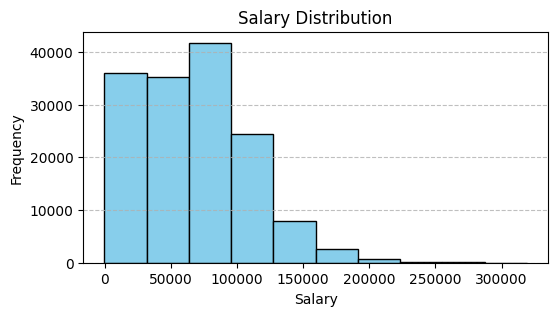

In [14]:
# i will creat Histogram to visualize the distribution of salaries

plt.figure(figsize=(6, 3))
plt.hist(df['BasePay'], bins=10, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

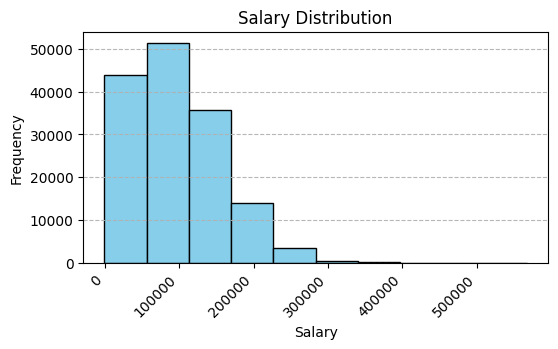

In [15]:
# i will creat Histogram to visualize the distribution of salaries

plt.figure(figsize=(6, 3))
plt.hist(df['TotalPayBenefits'], bins=10, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
df.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco


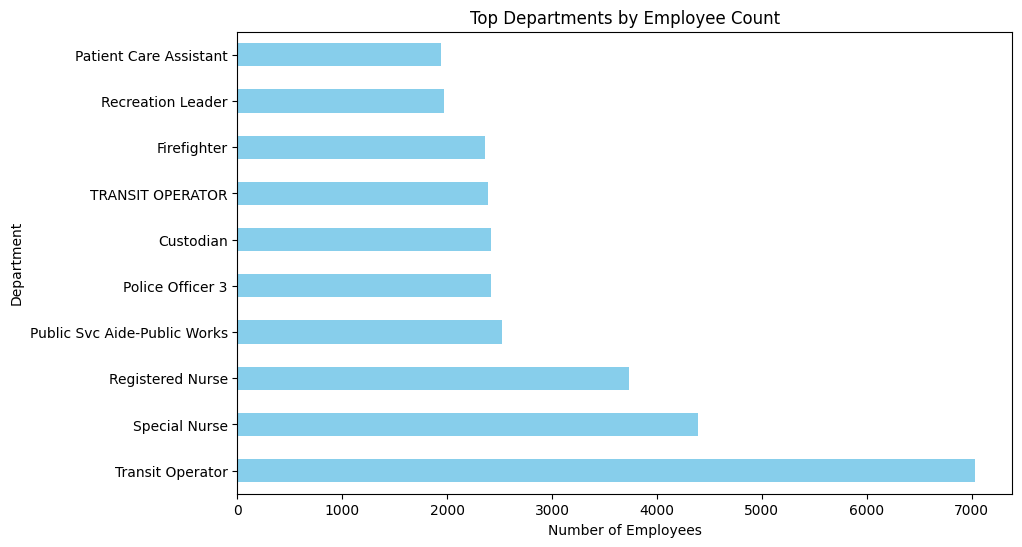

In [17]:
# Count the number of employees in each department
department_counts = df['JobTitle'].value_counts()

# Select the top N departments (adjust N based on your preference)
top_departments = department_counts.head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
top_departments.plot(kind='barh', color='skyblue')
plt.title('Top Departments by Employee Count')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.show()

#### 5- Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [18]:
average_salaries = df.groupby('JobTitle')['BasePay'].mean()

print("Average Salaries by Department:")
print(average_salaries)

Average Salaries by Department:
JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2158, dtype: float64


#### 6- Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

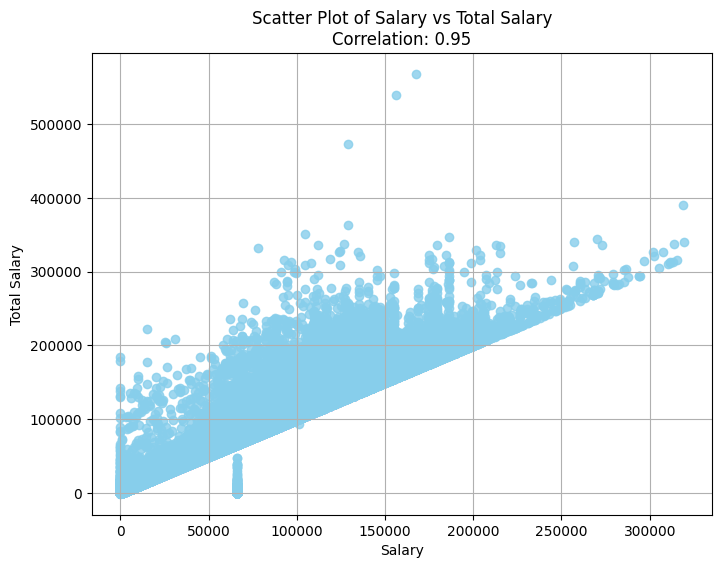

In [19]:
correlation = df['BasePay'].corr(df['TotalPay'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['BasePay'], df['TotalPay'], color='skyblue', alpha=0.8)
plt.title(f'Scatter Plot of Salary vs Total Salary\nCorrelation: {correlation:.2f}')
plt.xlabel('Salary')
plt.ylabel('Total Salary')
plt.grid(True)
plt.show()

#### 7- summary of Insights: Write a brief report summarizing the findings and insights from the analyses.

After we performed several operations such as: data cleaning, repairing missing values, imputation and exploratory data analysis
We concluded from the above that most employees receive an annual salary between (60,000 - 90,000) approximately “without benefits.”
While with benefits, it ranges between approximately (55,000 - 110,000).
then classified the employees according to the departments of each group
on the other hand we calculated the average salaries for each job and then created the relationship between the BasePay and the TotalPay

#

# Regards, Tariq Ibrahim